In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
 
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam    

In [15]:
(x_train , y_train) , (x_test , y_test) =mnist.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_train.astype('float32')/255.0
x_train = x_train.reshape((len(x_train) , np.prod(x_train.shape[1:])))
x_test = x_train.reshape((len(x_train) , np.prod(x_test.shape[1:])))

In [17]:
x_train , x_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [27]:
noise_factor = 0.4
x_train_noise = x_train + noise_factor*np.random.normal(size=x_train.shape)
x_test_noise = x_test + noise_factor*np.random.normal(size=x_test.shape)
x_train_noise = np.clip(x_train_noise , 0.0 , 1.0)
x_test_noise = np.clip(x_test_noise , 0.0 , 1.0)

In [55]:
pred = autoencoder.predict(x_test)

1875/1875 [==============================] - 6s 3ms/step


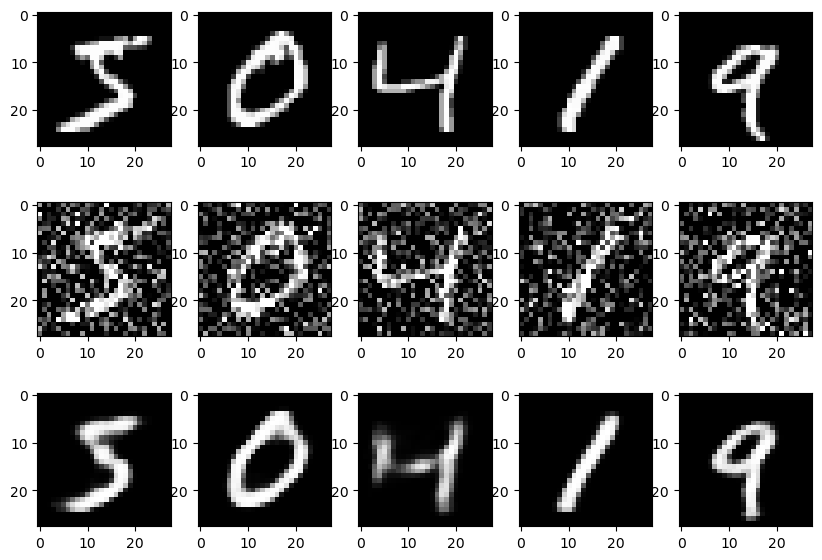

In [59]:
n =5
plt.figure(figsize=(10 , 7))
for i in range(n):
                    #row,columns,     
    ax = plt.subplot(3 , n , i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    if i == n/2:
        ax.set_title('Original Image')
        
 
    ax = plt.subplot(3 , n , i+n+1)
    plt.imshow(x_test_noise[i].reshape(28,28))
    plt.gray()
    if i == n/2:
        ax.set_title('Noise Image')
        
        
    ax = plt.subplot(3 , n , i+1+ 2*n )
    plt.imshow(pred[i].reshape(28,28))
    plt.gray()
    if i == n/2:
        ax.set_title('Pred Image')

In [45]:
input_size =x_train_noise.shape[1]
hidden_dim_1 = 128
hidden_dim_2 = 32

input_img = Input(shape=(input_size , ))
encoder = Dense(hidden_dim_1 , activation='relu')(input_img)

laten = Dense(hidden_dim_2 , activation='relu')(encoder)

decoder = Dense(hidden_dim_1 , activation='relu')(laten)
output_img = Dense(input_size , activation='sigmoid')(decoder)

autoencoder = Model(input_img , output_img)
autoencoder.compile(optimizer = 'adam' , loss='binary_crossentropy')
autoencoder.fit(x_train_noise , x_train , epochs=15)


Epoch 1/15
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1641
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1280
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1217
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1187
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1166
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1148
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1135
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1124
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1117
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1110
Epoch 11/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1105
Epoch 12/15
1875/1875 [==============================] - 10s 5ms/step - lo